## Deep Image Classification using Any Images of our choice

### 1. Setup and Load Data

#### 1.1 Install Dependencies and Setup

In [2]:
# !pip install matplotlib opencv-python

In [3]:
import tensorflow as tf
import os

2024-09-30 01:35:54.531142: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### 1.2 Remove dodgy images

In [14]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [15]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [16]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [17]:
os.listdir(os.path.join(data_dir, 'happy'))

['goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902540.jpg',
 'happy-people-vector-839522.jpg',
 'hdptcar-fi-2.jpg',
 'young-and-happy-people-vector-15114154.jpg',
 'habits-of-happy-people.jpg',
 'image27.jpeg',
 'tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg',
 '170404-happy-workers-feature.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 'image18.jpeg',
 'image19.jpeg',
 'images30.jpg',
 'happy-people-14410042.jpg',
 'how-happy-are-healthy-people.jpg',
 'images31.jpg',
 '154006829.jpg',
 'happiness.jpg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 'happy-people-702x336.jpg',
 'image17.jpeg',
 'images22.jpg',
 'image25.jpeg',
 'How-to-Be-Happy_1200x628-facebook.jpg',
 'How_Happy_Are_People_at_Work.jpg',
 'what-makes-people-happy.jpeg',
 'habits-that-define-very-happy-people.jpg',
 'image26.jpeg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'Top-Secrets-of-How-to-be-Happy.jpg',
 'happy-people_1463241208.jpg',
 'Hap

In [18]:
img = cv2.imread(os.path.join('data', 'happy', '154006829.jpg'))
type(img), img.shape

(numpy.ndarray, (3744, 5616, 3))

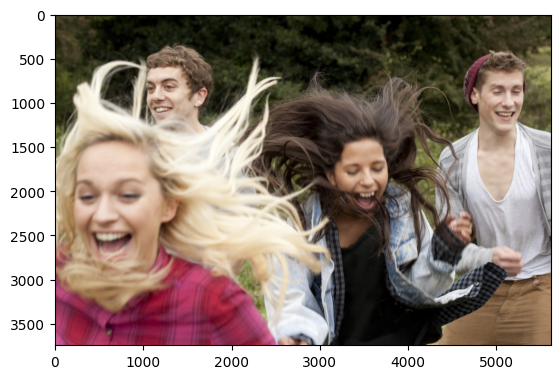

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print("Issue with image {}".format(image_path))

#### 1.3 Load Data

In [21]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [37]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128, 128))

Found 173 files belonging to 2 classes.


In [38]:
data_iterator = data.as_numpy_iterator()

In [52]:
# Get another batch from the iterator
batch = data_iterator.next()

In [53]:
batch

(array([[[[ 28.75     ,  41.75     ,  49.75     ],
          [ 29.       ,  42.       ,  50.       ],
          [ 28.75     ,  41.75     ,  49.75     ],
          ...,
          [ 55.       ,  75.       ,  92.       ],
          [ 54.25     ,  71.25     ,  89.25     ],
          [ 55.25     ,  72.25     ,  88.25     ]],
 
         [[ 30.5      ,  43.5      ,  51.5      ],
          [ 30.       ,  43.       ,  51.       ],
          [ 31.75     ,  44.75     ,  52.75     ],
          ...,
          [ 57.5      ,  78.5      ,  97.5      ],
          [ 56.75     ,  74.75     ,  94.75     ],
          [ 57.       ,  76.       ,  91.       ]],
 
         [[ 28.       ,  41.       ,  49.       ],
          [ 28.5      ,  41.5      ,  49.5      ],
          [ 31.25     ,  44.25     ,  52.25     ],
          ...,
          [ 59.75     ,  80.75     ,  99.75     ],
          [ 53.75     ,  75.75     ,  94.25     ],
          [ 60.       ,  78.       ,  98.       ]],
 
         ...,
 
         [[1

In [54]:
len(batch)

2

In [55]:
# Images represented as numpy arrays
batch[0].shape

(8, 128, 128, 3)

In [56]:
# Class 1 = SAD PEOPLE
# Class 0 = HAPPY PEOPLE
batch[1]

array([1, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

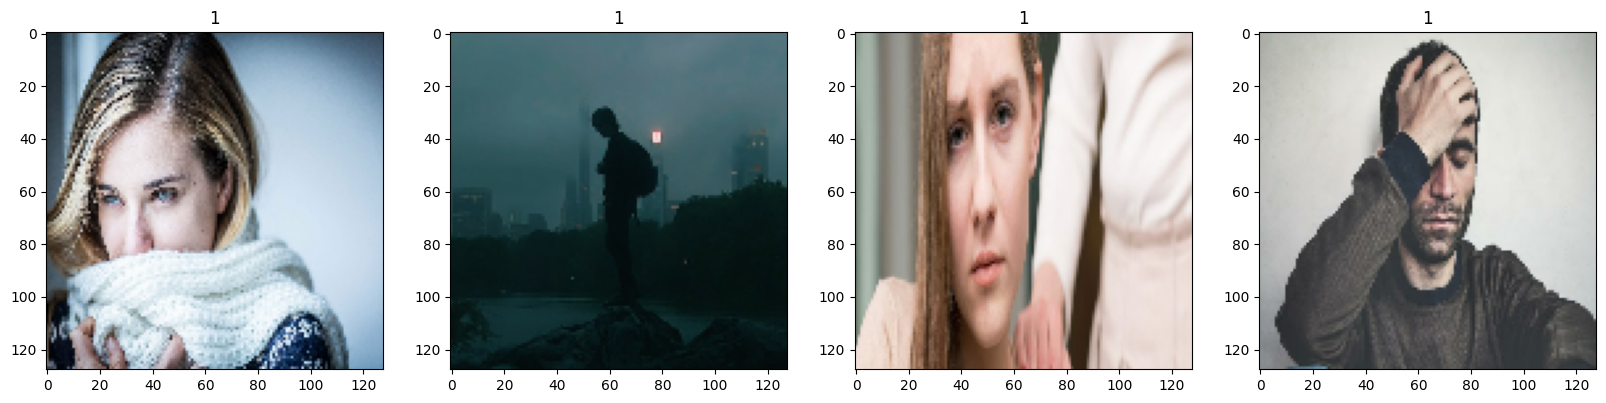

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 2. Preprocess Data

In [58]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

In [59]:
scaled = batch[0] / 255
scaled.min(), scaled.max()

(0.0, 1.0)

#### 2.1 Scale Data

In [60]:
data = data.map(lambda x, y: (x/255, y))

In [65]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch

(array([[[[7.30499387e-01, 7.30499387e-01, 7.30499387e-01],
          [7.04744875e-01, 7.04744875e-01, 7.04744875e-01],
          [7.44241595e-01, 7.44241595e-01, 7.44241595e-01],
          ...,
          [7.09129930e-01, 7.09129930e-01, 7.09129930e-01],
          [7.19493091e-01, 7.19493091e-01, 7.19493091e-01],
          [6.98039234e-01, 6.98039234e-01, 6.98039234e-01]],
 
         [[7.30499387e-01, 7.30499387e-01, 7.30499387e-01],
          [7.09497571e-01, 7.09497571e-01, 7.09497571e-01],
          [7.41885245e-01, 7.41885245e-01, 7.41885245e-01],
          ...,
          [6.95389092e-01, 6.95389092e-01, 6.95389092e-01],
          [7.16573238e-01, 7.16573238e-01, 7.16573238e-01],
          [7.23314941e-01, 7.23314941e-01, 7.23314941e-01]],
 
         [[7.31081486e-01, 7.31081486e-01, 7.31081486e-01],
          [7.18018830e-01, 7.18018830e-01, 7.18018830e-01],
          [7.38900900e-01, 7.38900900e-01, 7.38900900e-01],
          ...,
          [6.79694355e-01, 6.79694355e-01, 6.7969

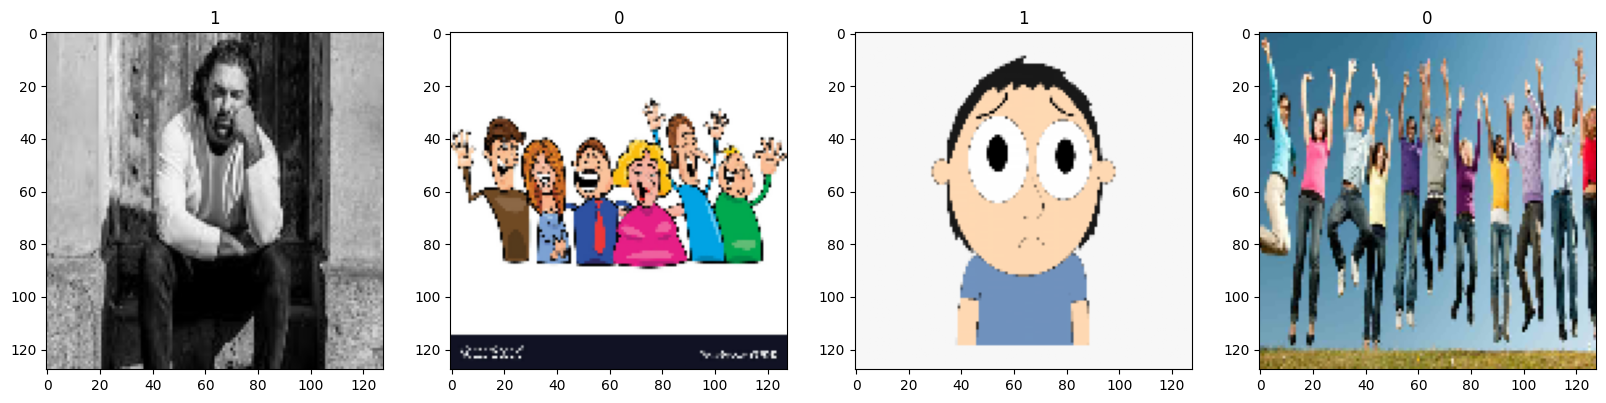

In [67]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### 2.2 Split Data

In [68]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [70]:
train_size, val_size, test_size

(15, 4, 2)

In [71]:
# reference: https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).take(test_size)

In [72]:
len(train), len(test), len(val)

(15, 2, 4)

### Deep Learning

#### 3.1 Build Deep Learning Model

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [74]:
model = Sequential()

In [75]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/aditya/miniconda3/envs/dl-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,041 (3.10 MB)

 Trainable params: 813,041 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

#### 3.2 Train

In [79]:
logdir='logs'

In [80]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [81]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.4438 - loss: 0.7843 - val_accuracy: 0.5312 - val_loss: 0.7383
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 295ms/step - accuracy: 0.5801 - loss: 0.6964 - val_accuracy: 0.7500 - val_loss: 0.6249
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - accuracy: 0.5226 - loss: 0.6570 - val_accuracy: 0.8750 - val_loss: 0.4435
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - accuracy: 0.7051 - loss: 0.5552 - val_accuracy: 0.8750 - val_loss: 0.3093
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 408ms/step - accuracy: 0.7214 - loss: 0.5605 - val_accuracy: 0.8438 - val_loss: 0.3287
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - accuracy: 0.7382 - loss: 0.5625 - val_accuracy: 0.8438 - val_loss: 0.3718
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.8267 - loss: 0.3416 - val_accuracy: 0.8750 - val_loss: 0.2870
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.8774 - loss: 0.2794 - val_accuracy: 0

#### 3.3 Plot Performance

In [82]:
hist.history

{'accuracy': [0.5333333611488342,
  0.5833333134651184,
  0.625,
  0.7083333134651184,
  0.75,
  0.8333333134651184,
  0.7916666865348816,
  0.8999999761581421,
  0.9083333611488342,
  0.8833333253860474,
  0.9416666626930237,
  0.9333333373069763,
  0.9583333134651184,
  0.9416666626930237,
  0.9666666388511658,
  0.9750000238418579,
  0.9583333134651184,
  0.9916666746139526,
  1.0,
  1.0],
 'loss': [0.7243644595146179,
  0.6889888048171997,
  0.6142972707748413,
  0.5494544506072998,
  0.5432888269424438,
  0.4622804820537567,
  0.35821813344955444,
  0.2710418403148651,
  0.2548163831233978,
  0.313475638628006,
  0.2038821429014206,
  0.18405787646770477,
  0.1187913715839386,
  0.16532666981220245,
  0.14069586992263794,
  0.09186932444572449,
  0.13612133264541626,
  0.05427049100399017,
  0.03174295648932457,
  0.015294267795979977],
 'val_accuracy': [0.53125,
  0.75,
  0.875,
  0.875,
  0.84375,
  0.84375,
  0.875,
  0.90625,
  0.90625,
  0.9375,
  0.96875,
  0.96875,
  0.9687

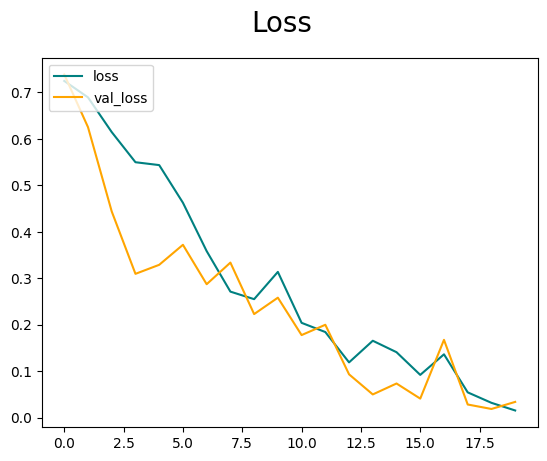

In [84]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

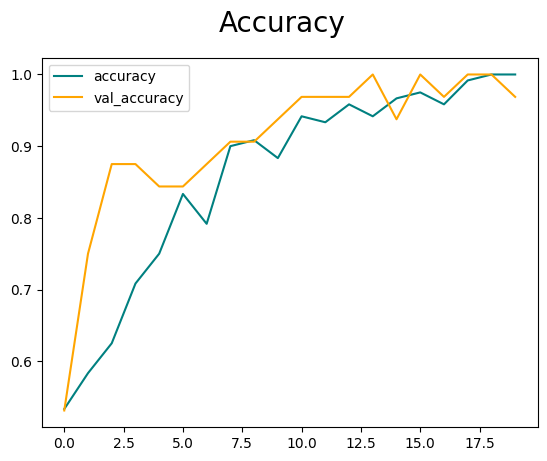

In [85]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 4. Evaluate Performance

#### 4.1 Evaluate 

In [87]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [88]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [89]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


2024-09-30 07:44:05.625402: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [93]:
print(f'Precision: {pre.result().numpy():.2f}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.80, Recall: 1.0, Accuracy: 0.9375


#### 4.2 Test

In [94]:
import cv2

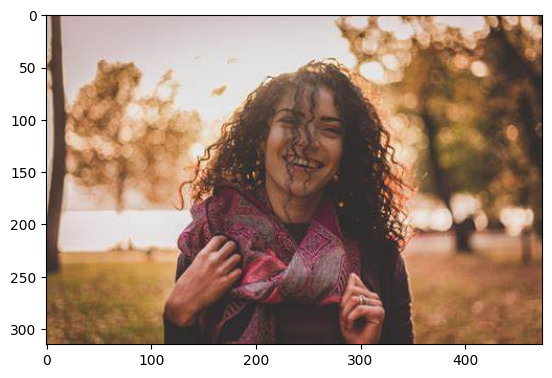

In [97]:
img = cv2.imread('sample-test-happy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

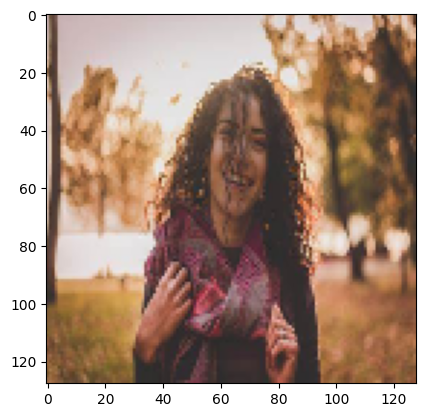

In [102]:
resize = tf.image.resize(img, (128, 128))
plt.imshow(cv2.cvtColor(resize.numpy()/255, cv2.COLOR_BGR2RGB))
plt.show()

In [106]:
resize.shape

TensorShape([128, 128, 3])

In [105]:
np.expand_dims(resize, axis=0).shape  # to mimic single image as batch

(1, 128, 128, 3)

In [103]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [107]:
yhat

array([[0.22800428]], dtype=float32)

In [108]:
if yhat > 0.5:
    print(f"Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Happy


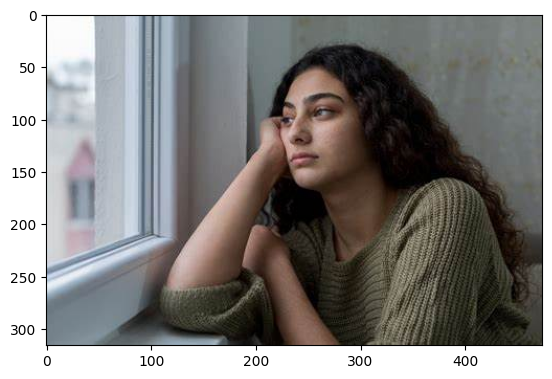

In [109]:
img = cv2.imread('sample-test-sad.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

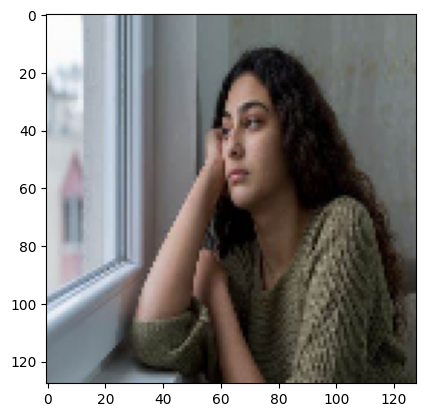

In [110]:
resize = tf.image.resize(img, (128, 128))
plt.imshow(cv2.cvtColor(resize.numpy()/255, cv2.COLOR_BGR2RGB))
plt.show()

In [112]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.98374456]], dtype=float32)

In [113]:
if yhat > 0.5:
    print(f"Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad


### 5. Save the Model

#### 5.1 Save the model

In [114]:
from tensorflow.keras.models import load_model

In [116]:
model.save(os.path.join('models', 'happysadclassifier_v1.h5'))

In [117]:
new_model = load_model(os.path.join('models', 'happysadclassifier_v1.h5'))

In [118]:
new_model

<Sequential name=sequential, built=True>

In [119]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.98374456]], dtype=float32)

In [120]:
if yhat > 0.5:
    print(f"Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad
